146 146


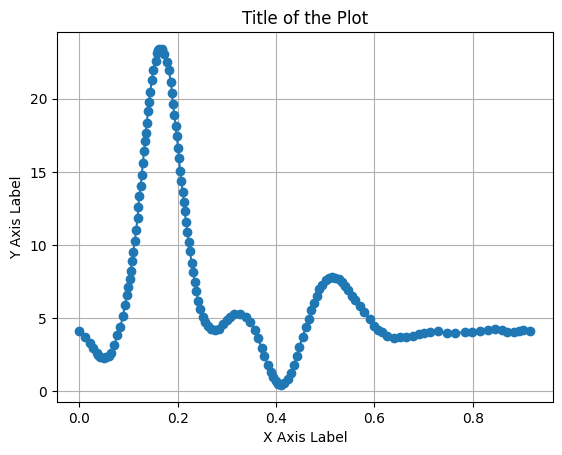

In [2]:
import csv
import matplotlib.pyplot as plt

# Lists to store data
x_values = []
y_values = []

filePath = 'example_inlet.csv'
# Read data from CSV file
with open(filePath, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        x_values.append(float(row[0]))
        y_values.append(float(row[1]))

print(len(x_values),len(y_values))
# Plot the data
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Title of the Plot')
plt.grid(True)
plt.show()

/tmp/ipykernel_15421/195517824.py:21: DeprecationWarning: The SafeConfigParser class has been renamed to ConfigParser in Python 3.2. This alias will be removed in Python 3.12. Use ConfigParser directly instead.
  config = SafeConfigParser()


length of atery:  27.0
[296 316 335]
(401, 400)


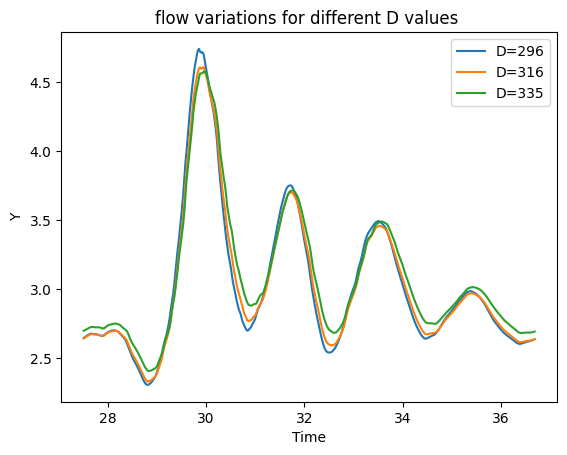

(401, 400)


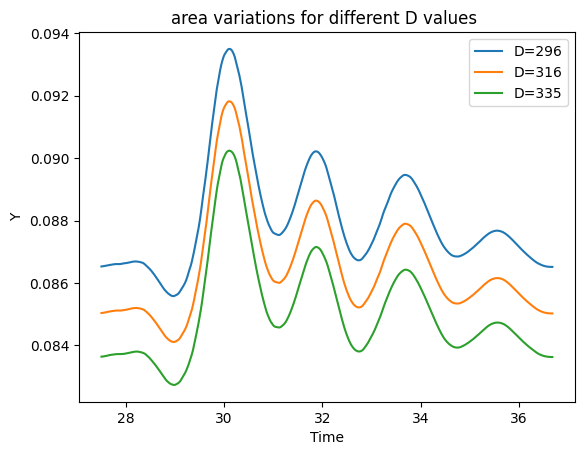

(401, 400)


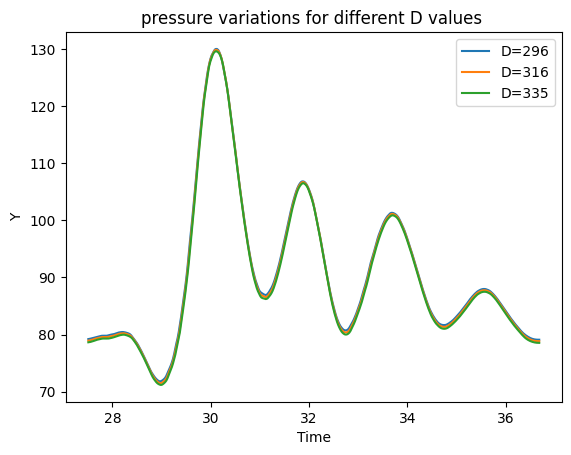

In [10]:
import sys
import numpy as np
import matplotlib
from configparser import SafeConfigParser
import matplotlib.pyplot as plt

def read_output(filename):
    """
    Read data file generated in the output folder.

    Arguments
    ---------
    rc : string
        Data file name

    Returns
    -------
    return : tuple
        Tuple of all parameters stored in the file
    """
    config = SafeConfigParser()
    config.read(filename)

    order = config.getint('data', 'order')
    Nx = config.getint('data', 'Nx')
    Nt = config.getint('data', 'Nt')
    T0 = config.getfloat('data', 'T0')
    T = config.getfloat('data', 'T')
    L = [float(f) for f in config.get('data', 'L').split(',')]
    rc = config.getfloat('data', 'rc')
    qc = config.getfloat('data', 'qc')
    rho = config.getfloat('data', 'rho')
    mesh_locations = config.get('data', 'mesh_locations').split(',')
    names = config.get('data', 'names').split(',')
    locations = config.get('data', 'locations').split(',')

    return order, Nx, Nt, T0, T, L, rc, qc, rho, mesh_locations,\
           names, locations


def plot_matrix(t, x, M, label, output):

    print('Making plot of %s-matrix.' % (label))
    T, X = np.meshgrid(t, x)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(T, X, M, rstride=1, cstride=1,  cmap='viridis',
                           linewidth=0, antialiased=False)
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.set_zlabel(label)
    ax.set_ylim(min(x), max(x))
    ax.set_xlim(min(t), max(t))
    print('Saving matrix to %s.' % (output))


def plot_1D(t, x, M, label, output):
    
    fig, ax = plt.subplots(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    ax.plot(t, y)
    ax.set_xlabel('Time')
    ax.set_ylabel('Data')
    ax.set_title(output)

def plot_multiple(t, M, D,name):
    for d in D:
        y = M[d, :]
        plt.plot(t, y, label=f"D={d}")

    plt.xlabel('Time')  # You may need to replace 'Time' with the appropriate label
    plt.ylabel('Y')  # You may need to replace 'Y' with the appropriate label
    plt.title(name +' variations for different D values ')
    plt.legend()
    plt.show()



data_location = '/home/biyon/FYP/bloodflow-1d-model/out/output/4cycles_last/data.cfg'

order, Nx, Nt, T0, T, L, rc, qc, rho, mesh_locations, names, locations = read_output(data_location)

t = np.linspace(T0, T, Nt)



# for j in range(2**order-1):

j = 1
x = np.linspace(0, L[j], Nx+1)
print("length of atery: ", L[j])


D = [20,21.3,22.6]
for d in D:
    if d>L[i]:
        raise ValueError('Specified length is larger than atery length')
        
D = np.round(400*np.array(D)/L[j]).astype(int)
print(D)


for i, name in enumerate(names):

    
    
    M = np.load('%s/%s_%i_M.npy' % (locations[i], name, j))
    print(M.shape)


    plot_multiple(t,M,D,name)

 
    # plot_1D(t, x, y, name, '%s/%s' % (name, j))

    # plot_matrix(t, x, M, name, '%s/%s_%i.png' % (locations[i], name, j))

# for j in range(2**order-1):

    

In [5]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 1.1 MB/s eta 0:00:001.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_15421/2563203184.py:21: DeprecationWarning: The SafeConfigParser class has been renamed to ConfigParser in Python 3.2. This alias will be removed in Python 3.12. Use ConfigParser directly instead.
  config = SafeConfigParser()


length of atery:  27.0
[296 316 335]
(401, 400)


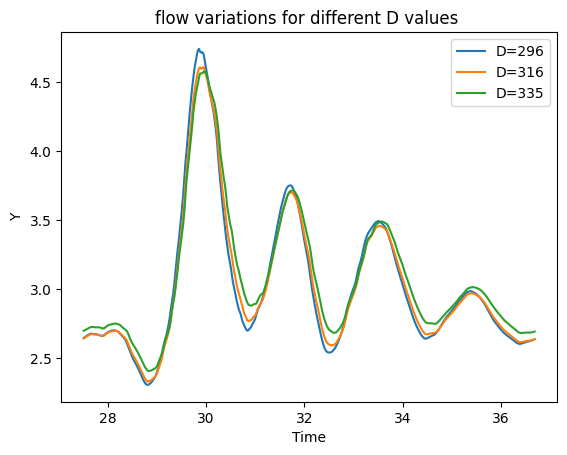

(401, 400)


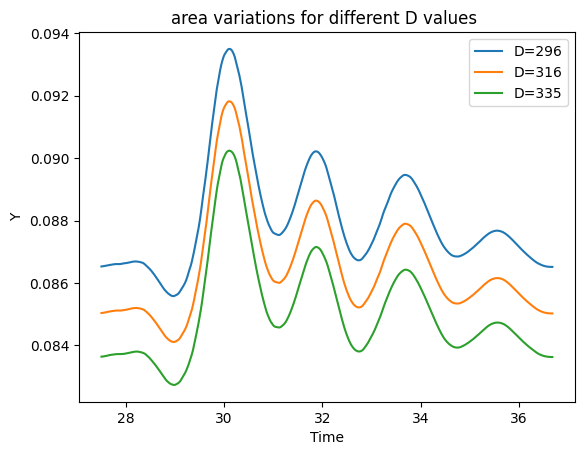

(401, 400)


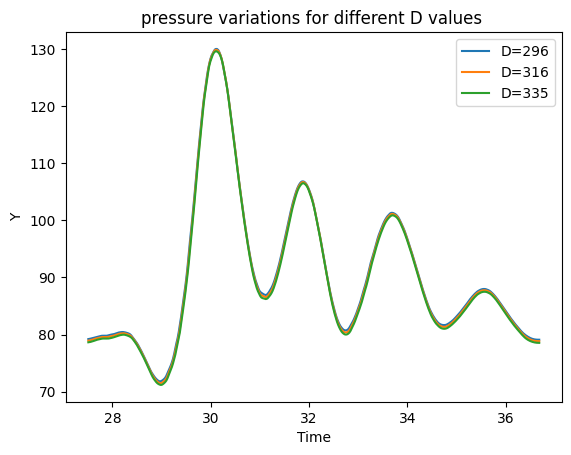

In [8]:
import sys
import numpy as np
import matplotlib
from configparser import SafeConfigParser
import matplotlib.pyplot as plt

def read_output(filename):
    """
    Read data file generated in the output folder.

    Arguments
    ---------
    rc : string
        Data file name

    Returns
    -------
    return : tuple
        Tuple of all parameters stored in the file
    """
    config = SafeConfigParser()
    config.read(filename)

    order = config.getint('data', 'order')
    Nx = config.getint('data', 'Nx')
    Nt = config.getint('data', 'Nt')
    T0 = config.getfloat('data', 'T0')
    T = config.getfloat('data', 'T')
    L = [float(f) for f in config.get('data', 'L').split(',')]
    rc = config.getfloat('data', 'rc')
    qc = config.getfloat('data', 'qc')
    rho = config.getfloat('data', 'rho')
    mesh_locations = config.get('data', 'mesh_locations').split(',')
    names = config.get('data', 'names').split(',')
    locations = config.get('data', 'locations').split(',')

    return order, Nx, Nt, T0, T, L, rc, qc, rho, mesh_locations,\
           names, locations


def plot_matrix(t, x, M, label, output):

    print('Making plot of %s-matrix.' % (label))
    T, X = np.meshgrid(t, x)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(T, X, M, rstride=1, cstride=1,  cmap='viridis',
                           linewidth=0, antialiased=False)
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.set_zlabel(label)
    ax.set_ylim(min(x), max(x))
    ax.set_xlim(min(t), max(t))
    print('Saving matrix to %s.' % (output))


def plot_1D(t, x, M, label, output):
    
    fig, ax = plt.subplots(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    ax.plot(t, y)
    ax.set_xlabel('Time')
    ax.set_ylabel('Data')
    ax.set_title(output)

def plot_multiple(t, M, D,name):
    for d in D:
        y = M[d, :]
        plt.plot(t, y, label=f"D={d}")

    plt.xlabel('Time')  # You may need to replace 'Time' with the appropriate label
    plt.ylabel('Y')  # You may need to replace 'Y' with the appropriate label
    plt.title(name +' variations for different D values ')
    plt.legend()
    plt.show()



data_location = '/home/biyon/FYP/bloodflow-1d-model/out/output/4cycles_last/data.cfg'

order, Nx, Nt, T0, T, L, rc, qc, rho, mesh_locations, names, locations = read_output(data_location)

t = np.linspace(T0, T, Nt)



# for j in range(2**order-1):

j = 1
x = np.linspace(0, L[j], Nx+1)
print("length of atery: ", L[j])


D = [20,21.3,22.6]
for d in D:
    if d>L[j]:
        raise ValueError('Specified length is larger than atery length')
        
D = np.round(400*np.array(D)/L[j]).astype(int)
print(D)


for i, name in enumerate(names):

    
    
    M = np.load('%s/%s_%i_M.npy' % (locations[i], name, j))
    print(M.shape)


    plot_multiple(t,M,D,name)

 
    # plot_1D(t, x, y, name, '%s/%s' % (name, j))

    # plot_matrix(t, x, M, name, '%s/%s_%i.png' % (locations[i], name, j))

# for j in range(2**order-1):

    

/tmp/ipykernel_11020/565049355.py:23: DeprecationWarning: The SafeConfigParser class has been renamed to ConfigParser in Python 3.2. This alias will be removed in Python 3.12. Use ConfigParser directly instead.
  config = SafeConfigParser()


3.4091638422296597
length of atery:  27.0
[296 316 335]
(401, 400)
(401, 400)
(401, 400)
flow (400,) <class 'numpy.float64'>
area (400,) <class 'numpy.float64'>
pressure (400,) <class 'numpy.float64'>
min p y :  56
min p y :  72
min p ab :  56
croped : (400,)
(400, 3)


100%|██████████| 400/400 [05:00<00:00,  1.33it/s]


(401, 400)
(401, 400)
(401, 400)
flow (400,) <class 'numpy.float64'>
area (400,) <class 'numpy.float64'>
pressure (400,) <class 'numpy.float64'>
min p y :  57
min p y :  74
min p ab :  57
croped : (400,)
(400, 3)


100%|██████████| 400/400 [06:22<00:00,  1.05it/s]


(401, 400)
(401, 400)
(401, 400)
flow (400,) <class 'numpy.float64'>
area (400,) <class 'numpy.float64'>
pressure (400,) <class 'numpy.float64'>
min p y :  57
min p y :  75
min p ab :  57
croped : (400,)
(400, 3)


100%|██████████| 400/400 [05:05<00:00,  1.31it/s]


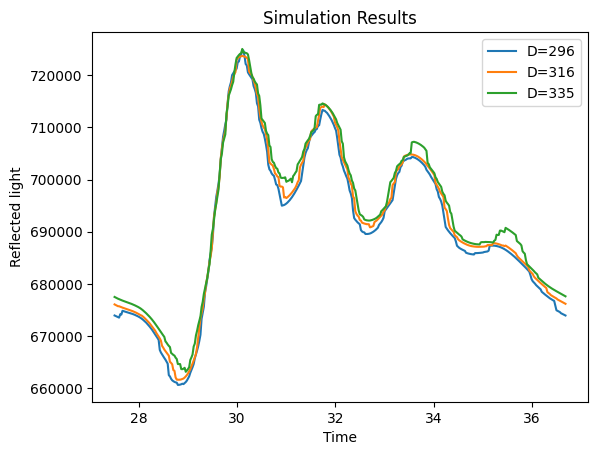

In [1]:
import sys
import numpy as np
import matplotlib
from configparser import SafeConfigParser
import matplotlib.pyplot as plt
from skinModel import model
from tqdm import tqdm

def read_output(filename):
    """
    Read data file generated in the output folder.

    Arguments
    ---------
    rc : string
        Data file name

    Returns
    -------
    return : tuple
        Tuple of all parameters stored in the file
    """
    config = SafeConfigParser()
    config.read(filename)

    order = config.getint('data', 'order')
    Nx = config.getint('data', 'Nx')
    Nt = config.getint('data', 'Nt')
    T0 = config.getfloat('data', 'T0')
    T = config.getfloat('data', 'T')
    L = [float(f) for f in config.get('data', 'L').split(',')]
    rc = config.getfloat('data', 'rc')
    qc = config.getfloat('data', 'qc')
    rho = config.getfloat('data', 'rho')
    mesh_locations = config.get('data', 'mesh_locations').split(',')
    names = config.get('data', 'names').split(',')
    locations = config.get('data', 'locations').split(',')

    return order, Nx, Nt, T0, T, L, rc, qc, rho, mesh_locations,\
           names, locations



data_location = '/home/biyon/FYP/bloodflow-1d-model/out/output/4cycles_last/data.cfg'

order, Nx, Nt, T0, T, L, rc, qc, rho, mesh_locations, names, locations = read_output(data_location)



time = np.linspace(T0, T, Nt)
time3 = np.linspace(T0, T0+3*(T-T0), 3*Nt)
fs = Nt/(T-T0)

A = np.pi * (( 1.75 / 1000) ** 2)
m_d = 1613
k = (10 ** -6)
Qc = (328 * k) / (A*10)
print(Qc)
nd = 0.6875
na = 0.3125
tud = 0.39
tua = 1.78


j = 1
x = np.linspace(0, L[j], Nx+1)
print("length of atery: ", L[j])


D = [20,21.3,22.6]
for d in D:
    if d>L[j]:
        raise ValueError('Specified length is larger than atery length')
        
D = np.round(400*np.array(D)/L[j]).astype(int)
print(D)

ppgs = []
for d in D:
    waveForm = dict()
    for i, name in enumerate(names):

            
        M = np.load('%s/%s_%i_M.npy' % (locations[i], name, j))
        print(M.shape)

        y = M[d, :]

        waveForm[name] = y

    #print(waveForm) #flow,area,pressure

    


    for key, val in waveForm.items():
        print(key, val.shape, type(val[0]))
        if (val.shape[0]!=Nt):
            raise ValueError('Waveforms Length is not consistant')
        
    diameter = 2*np.sqrt(waveForm["area"]/np.pi)
 
    Q = (waveForm["flow"]/waveForm["area"])/100


    y = np.sign(Q) * m_d * (np.sqrt(np.abs(Q / Qc)) / (1 + np.sqrt(np.abs(Q / Qc))))
    norm_y = y / np.max(y)

    norm_y_min = np.argmin(norm_y, axis=0)
    print("min p y : ", norm_y_min)

    norm_y_3 = np.tile(norm_y,3)

    delta = nd * np.exp(-time / tud) + na * np.exp(-time / tua)
    norm_delta = delta / np.sum(delta)

    ab_org = np.convolve(norm_y_3, norm_delta, 'same')
    ab_crop = ab_org[200:800]

    ab_min = np.argmin(ab_crop, axis=0)
    print("min p y : ", ab_min)

    if (ab_min<norm_y_min):
        raise ValueError("Min point cannot find")
    
    start_ab = 200 + ab_min - norm_y_min 
    # start_ab = 0 

    ab = ab_org[start_ab:start_ab+400]

    # n = max(len(norm_y), len(norm_delta))
    # norm_y_centered = np.pad(norm_y, (n - len(norm_y), 0), mode='constant')
    # norm_delta_centered = np.pad(norm_delta, (n - len(norm_delta), 0), mode='constant')

    # # Convolve the centered signals
    # ab_centered = np.convolve(norm_y_centered, norm_delta_centered, 'same')

    # ab_croped = ab_centered[Nt:2*Nt] 
    print("min p ab : ", np.argmin(ab, axis=0))
     

    print('croped :',ab.shape)
    # plt.plot(norm_delta)
    # plt.plot(ab)
    # plt.plot(norm_y)

    # # plt.plot(time3, ab_centered)
    # # plt.plot(time, ab_croped)
    # plt.xlabel('t')
    # plt.ylabel('Q')
    # plt.title('abbsobtion from flow')
    # plt.grid(True)
    # plt.show()

    # print(diameter.shape)
    # print(waveForm["pressure"].shape)
    # print(ab.shape)

    parameters = np.concatenate((diameter.reshape(Nt,1),waveForm["pressure"].reshape(Nt,1),ab.reshape(Nt,1)), axis=1)

    print(parameters.shape)

    nPhotonsCollected_values = np.zeros_like(time)

    # Loop over each time value
    for i in tqdm(range(len(time))):
        # Your existing code

        # print(parameters[i])
        nPhotonsCollected_values[i] = model(parameters[i])
        # print(nPhotonsCollected_values[i])

    # plt.plot(time, nPhotonsCollected_values, '-o')
    # plt.xlabel('t')
    # plt.ylabel('nPhotonsCollected')
    # plt.title('Simulation Results')
    # plt.grid(True)
    # plt.show()

    ppgs.append(nPhotonsCollected_values)
    plt.plot(time, nPhotonsCollected_values, label=f"D={d}")

plt.xlabel('Time')  # You may need to replace 'Time' with the appropriate label
plt.ylabel('Reflected light')  # You may need to replace 'Y' with the appropriate label
plt.title('Simulation Results')
plt.legend()
plt.show()

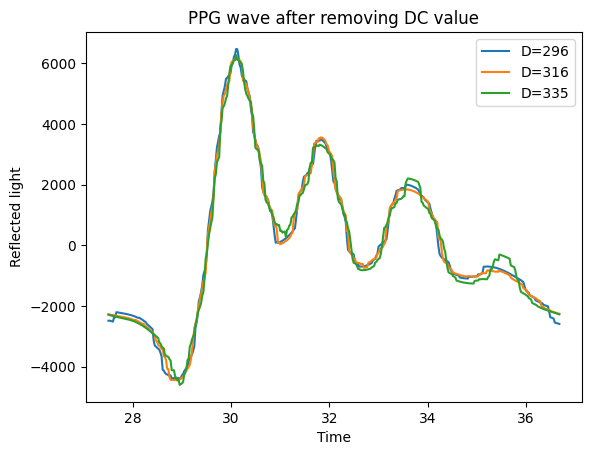

In [10]:
i=0
for wave in ppgs:
    mean = np.mean(wave)
    plt.plot( time,wave-mean, label=f"D={D[i]}")
    i+=1

plt.xlabel('Time')  # You may need to replace 'Time' with the appropriate label
plt.ylabel('Reflected light')  # You may need to replace 'Y' with the appropriate label
plt.title('PPG wave after removing DC value')
plt.legend()
plt.show()